# Get Dependencies

In [1]:
!rm -r CLUSTERING_ALGORITHMS utils
!git clone https://github.com/Q-b1t/CLUSTERING_ALGORITHMS.git
!mkdir utils && cp /content/CLUSTERING_ALGORITHMS/data_utils/* utils && cp /content/CLUSTERING_ALGORITHMS/SOFT_K_MEAN_CLUSTERING/SoftKMeanClustering.py utils

rm: cannot remove 'CLUSTERING_ALGORITHMS': No such file or directory
rm: cannot remove 'utils': No such file or directory
Cloning into 'CLUSTERING_ALGORITHMS'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 57 (delta 23), reused 46 (delta 12), pack-reused 0
Receiving objects: 100% (57/57), 10.20 KiB | 1.70 MiB/s, done.
Resolving deltas: 100% (23/23), done.


# Hierarchical Clustering
Since this method requires a dendogram, I will not implement from scratch. I will use scipy and stuff.

In [2]:
from future.utils import iteritems
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from utils.clustering_data_utils import *

##  Set up dataset parameters

In [3]:
N_SAMPLES = 800 # number of samples
DIMENTIONALITY = 2 # dimentionality (for visualization)
MEAN_DISTANCE = 5 # distance between the cluster means

[~] X shape: (800, 2)
[~] Y shape: (800,)


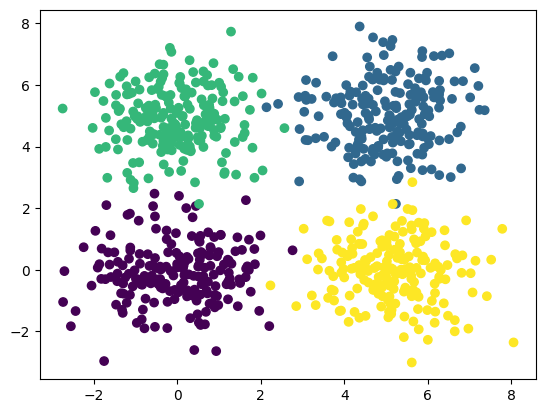

In [4]:
#  get some training data
X,Y = get_sample_cluster_data(
    D = DIMENTIONALITY,
    S = MEAN_DISTANCE,
    N = N_SAMPLES
)
print(f"[~] X shape: {X.shape}\n[~] Y shape: {Y.shape}")
plt.scatter(X[:,0],X[:,1],c=Y)

# Ward Clustering
Creating clusters by pairing the pairs that minimize the variance.

[~] Z shape: (799, 4)


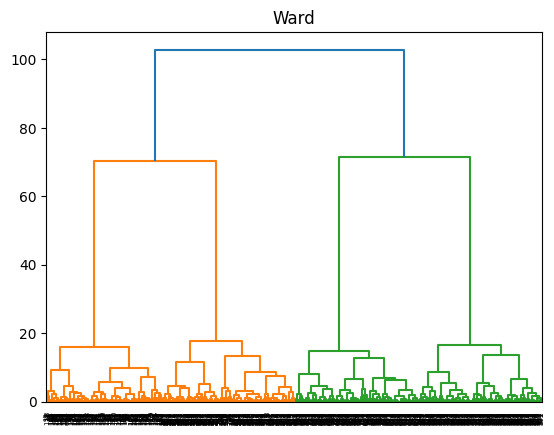

In [5]:
Z = linkage(X,"ward")
print(f"[~] Z shape: {Z.shape}")
plt.title("Ward")
dendrogram(Z)
plt.show()

# Single Clustering
Clustering via chossing pairs of clusters that yield the min distance between them.

[~] Z shape: (799, 4)


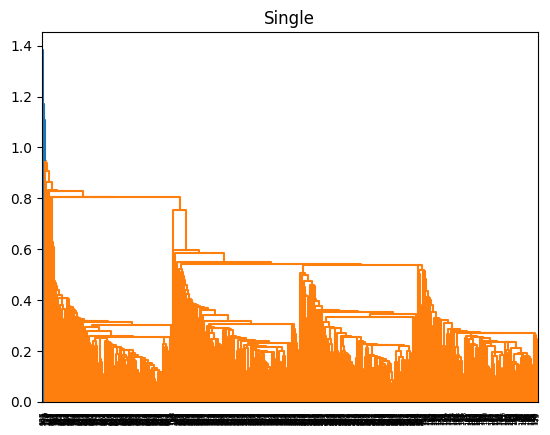

In [6]:
Z = linkage(X,"single")
print(f"[~] Z shape: {Z.shape}")
plt.title("Single")
dendrogram(Z)
plt.show()

# Complete Clustering
Same as above but grouing by max distance.

[~] Z shape: (799, 4)


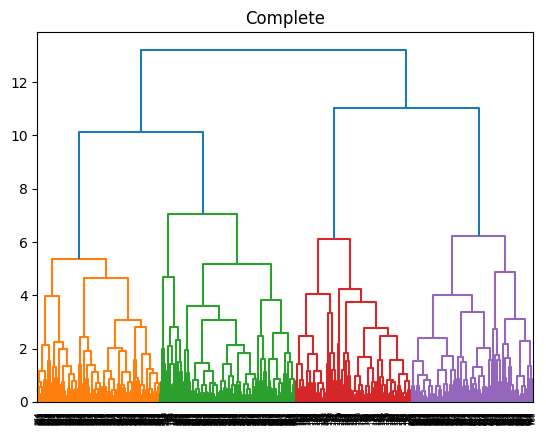

In [7]:
Z = linkage(X,"complete")
print(f"[~] Z shape: {Z.shape}")
plt.title("Complete")
dendrogram(Z)
plt.show()

# Experiment Results
I tested to code above with three different distances:
- ```S = 1```: There were not clusters at all, it is just a big blob of points. Nevertheless, it somehow the ward clustering method found 3 of natural classes. This is beause it can find slight differences in the points pairing because they come from different mean and therefore a different distribution. It is natutal to think that poinrs that belong to the same cluster will shoot a smaller variance that points with a different clusters.
- ```S = 5```: With the "intermediate" distance betweem clusters, the ward still has an average performance and only recongizez three natural clusters. The one that here stands out is the complete clustering. Since there us more distance between the clusters, not it easier to pair samples by the max distance. Therefore, it is natural that the algorithm can group the clusters that are futher away to each other and these will converge to 4 different blobs of data.
-  ```S = 10```: Again the complete ward is the one that prevails accurately finding 4 natural clusters. Ward clusters was actually poorer in this last experiment.